---

# DS400: Assignment IV (Python)

##### Lukas Schick (Student ID: 6291976)
##### January 13th, 2022

In [1]:
#import needed packages
import numpy as np
import pandas as pd
import requests
import time
from API_key_A5 import discoveryapi_key
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Exercise 7

In [2]:
#perform get request of ticketmaster site to get all venues in Germany
res = requests.get('https://app.ticketmaster.com/discovery/v2/venues?', 
             params = {"apikey" : discoveryapi_key,
                       "countryCode" : "DE"}).json()

The resulting list gives information on the returned venues, a specific venue can be accessed by appending `_embedded`$venues[[x]] to the content object. In this way, information on a specific venue, like its name, address or city can be accessed. There is also additional information on the number of results per page, the number of pages, total results and the current page number and more.

## Exercise 8

In [3]:
#initialize empty df for total results
venues = pd.DataFrame({'name' : [],
                       'city' : [],
                       'postalCode' : [],
                       'address' : [],
                       'url' : [],
                       'longitude' : [],
                       'latitude' : []})

In [4]:
#for each result on the page, do the following
for i in range(0, res['page']['size']):
    #get name, city, postalCode etc. if they are available, otherwise use None
    try:
        name = res['_embedded']['venues'][i]['name']
    except:
        name = None
    try: 
        city = res['_embedded']['venues'][i]['city']['name']
    except:
        city = None
    try:
        postalCode = res['_embedded']['venues'][i]['postalCode']
    except:
        postalCode = None
    try:
        address = res['_embedded']['venues'][i]['address']['line1']
    except:
        address = None
    try:
        url = res['_embedded']['venues'][i]['url']
    except:
        url = None
    try:
        longitude = res['_embedded']['venues'][i]['location']['longitude']
    except:
        longitude = None
    try:
        latitude = res['_embedded']['venues'][i]['location']['latitude']
    except:
        latitude = None
    #append latest result to dataframe
    venues = venues.append({'name': name, 'city': city, 'postalCode': postalCode, 'address': address,
                       'url' : url, 'longitude' : longitude, 'latitude': latitude}, ignore_index=True)

In [5]:
venues

,name,city,postalCode,address,url,longitude,latitude
0,Gruenspan,Hamburg,22767,Grosse Freiheit 58,http://www.ticketmaster.de/venue/287155,9.958075,53.551885
1,Huxleys Neue Welt,Berlin,10967,Hasenheide 107 – 113,http://www.ticketmaster.de/venue/286842,13.42138,52.486391
2,various venues,Bremen,28195,None,https://www.ticketmaster.de/venue/diverse-loca...,8.80719,53.07574
3,Virtual Event,Worldwide,None,None,https://www.ticketmaster.de/venue/virtuelles-e...,10.0,50.0
4,Ev. St. Jacobi Kirche,Sangerhausen,06526,Marktplatz,http://www.ticketmaster.de/venue/290061,None,None
5,Evangelische Kirche,Senden,48308,Steverstrasse 5,http://www.ticketmaster.de/venue/290066,None,None
6,HDI Arena,Hannover,None,Robert-Enke-Straße 1,http://www.ticketmaster.de/venue/461692,9.73371,52.361993
7,Arsenal,Berlin,10785,Potsdamer Strasse 2,http://www.ticketmaster.de/venue/290646,None,None
8,Freilichtbühne Heppenheim,Heppenheim,64646,Oberhalb der Stadt,http://www.ticketmaster.de/venue/290639,None,None
9,Schlosswallhalle,Osnabrück,49074,Schlosswall 10,http://www.ticketmaster.de/venue/290630,None,None


## Exercise 9

In [59]:
#perform get request of ticketmaster site to get all venues in Germany
res = requests.get('https://app.ticketmaster.com/discovery/v2/venues?', 
             params = {"apikey" : discoveryapi_key,
                       "countryCode" : "DE"}).json()

In [60]:
#compute total number of result pages
num_pages = res['page']['totalPages']

#initialize empty df for total results
venues = pd.DataFrame({'name' : [],
                       'city' : [],
                       'postalCode' : [],
                       'address' : [],
                       'url' : [],
                       'longitude' : [],
                       'latitude' : []})

In [61]:
#for every results page, do the following
for j in range(0,num_pages):
    
    #sleep for 0.2 seconds to relieve stress from site
    time.sleep(0.2)
    
    #perform get request of ticketmaster site to get all venues in Germany
    res = requests.get('https://app.ticketmaster.com/discovery/v2/venues?', 
             params = {"apikey" : discoveryapi_key,
                       "countryCode" : "DE",
                       "page" : j}).json()
    
    
    #check if there are results on the page (sometimes due to connection errors, no results will show up)
    try:
        #for each result on the page, do the following
        for i in range(0, len(res['_embedded']['venues'])):
            #get name, city, postalCode etc. if they are available, otherwise use None
            try:
                name = res['_embedded']['venues'][i]['name']
            except:
                name = None
            try: 
                city = res['_embedded']['venues'][i]['city']['name']
            except:
                city = None
            try:
                postalCode = res['_embedded']['venues'][i]['postalCode']
            except:
                postalCode = None
            try:
                address = res['_embedded']['venues'][i]['address']['line1']
            except:
                address = None
            try:
                url = res['_embedded']['venues'][i]['url']
            except:
                url = None
            try:
                longitude = res['_embedded']['venues'][i]['location']['longitude']
            except:
                longitude = None
            try:
                latitude = res['_embedded']['venues'][i]['location']['latitude']
            except:
                latitude = None
            venues = venues.append({'name': name, 'city': city, 'postalCode': postalCode, 'address': address,
                               'url' : url, 'longitude' : longitude, 'latitude': latitude}, ignore_index=True)
    #if results for this page can't be loaded due to a connection error, pass
    except:
        pass

In [62]:
#print first ten results
venues.head(10)

,name,city,postalCode,address,url,longitude,latitude
0,Gruenspan,Hamburg,22767,Grosse Freiheit 58,http://www.ticketmaster.de/venue/287155,9.958075,53.551885
1,Huxleys Neue Welt,Berlin,10967,Hasenheide 107 – 113,http://www.ticketmaster.de/venue/286842,13.42138,52.486391
2,various venues,Bremen,28195,None,https://www.ticketmaster.de/venue/diverse-loca...,8.80719,53.07574
3,Virtual Event,Worldwide,None,None,https://www.ticketmaster.de/venue/virtuelles-e...,10.0,50.0
4,Ev. St. Jacobi Kirche,Sangerhausen,06526,Marktplatz,http://www.ticketmaster.de/venue/290061,None,None
5,Evangelische Kirche,Senden,48308,Steverstrasse 5,http://www.ticketmaster.de/venue/290066,None,None
6,HDI Arena,Hannover,None,Robert-Enke-Straße 1,http://www.ticketmaster.de/venue/461692,9.73371,52.361993
7,Arsenal,Berlin,10785,Potsdamer Strasse 2,http://www.ticketmaster.de/venue/290646,None,None
8,Freilichtbühne Heppenheim,Heppenheim,64646,Oberhalb der Stadt,http://www.ticketmaster.de/venue/290639,None,None
9,Schlosswallhalle,Osnabrück,49074,Schlosswall 10,http://www.ticketmaster.de/venue/290630,None,None


In [48]:
#print shape
np.shape(venues)

(4685, 7)

## Exercises 10 + 11

In [49]:
#drop NAs from longitude and latitude data
longitude = pd.to_numeric(venues["longitude"].dropna())
latitude = pd.to_numeric(venues["latitude"].dropna())

In [50]:
#make sure to only use data within the specified country bounds
longitude = longitude.loc[lambda x : (x > 5.866) & (x < 15.042)]

In [52]:
latitude = latitude.loc[lambda x : (x > 47.270) & (x < 55.059)]

<AxesSubplot:>

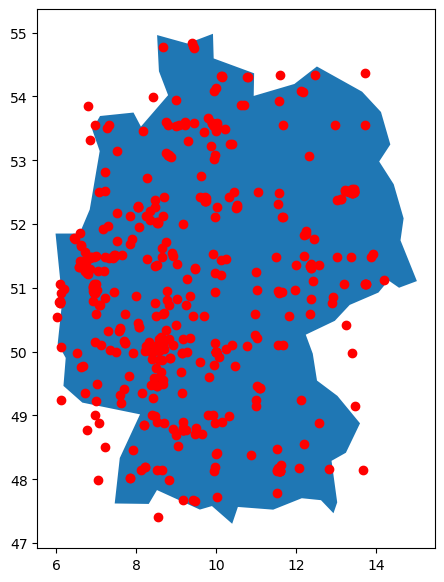

In [56]:
#plot the venues on a map of Germany
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(longitude, latitude, 'ro')
# get a base map of Germany
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) 
map = map[map.name == "Germany"]
# plot the map
map.plot(ax = ax)

## Exercise 12

In [82]:
#perform get request of ticketmaster site to get all venues in France
res = requests.get('https://app.ticketmaster.com/discovery/v2/venues?', 
             params = {"apikey" : discoveryapi_key,
                       "countryCode" : "FR"}).json()

In [83]:
#get total number of result pages
num_pages = res['page']['totalPages']

#initialize empty df for total results
venues = pd.DataFrame({'name' : [],
                       'city' : [],
                       'postalCode' : [],
                       'address' : [],
                       'url' : [],
                       'longitude' : [],
                       'latitude' : []})

In [84]:
#for every result page, do the following
for j in range(0,num_pages):
    #sleep for 0.2 seconds to relieve stress from site
    time.sleep(0.2)
    
    #perform get request of ticketmaster site to get all venues in France
    res = requests.get('https://app.ticketmaster.com/discovery/v2/venues?', 
             params = {"apikey" : discoveryapi_key,
                       "countryCode" : "FR",
                       "page" : j}).json()
    
    
    #check if there are results on the page (sometimes due to connection errors, no results will show up)
    try:
        #for every result on the page, do the following
        for i in range(0, len(res['_embedded']['venues'])):
            #get name, city, postalCode etc. if they are available, otherwise use None
            try:
                name = res['_embedded']['venues'][i]['name']
            except:
                name = None
            try: 
                city = res['_embedded']['venues'][i]['city']['name']
            except:
                city = None
            try:
                postalCode = res['_embedded']['venues'][i]['postalCode']
            except:
                postalCode = None
            try:
                address = res['_embedded']['venues'][i]['address']['line1']
            except:
                address = None
            try:
                url = res['_embedded']['venues'][i]['url']
            except:
                url = None
            try:
                longitude = res['_embedded']['venues'][i]['location']['longitude']
            except:
                longitude = None
            try:
                latitude = res['_embedded']['venues'][i]['location']['latitude']
            except:
                latitude = None
                
            #append latest result to dataframe
            venues = venues.append({'name': name, 'city': city, 'postalCode': postalCode, 'address': address,
                               'url' : url, 'longitude' : longitude, 'latitude': latitude}, ignore_index=True)
    #if results for this page can't be loaded due to a connection error, pass
    except:
        pass

In [85]:
#print first ten results
venues.head(10)

,name,city,postalCode,address,url,longitude,latitude
0,Le Trabendo,Paris,75019,"Parc de la Villette, 211 Avenue Jean Jaurès",None,2.39026,48.8938489
1,Stade Chaban-Delmas,Bordeaux,33000,Place Johnston,None,None,None
2,Accorhotels Arena,Paris,75012,8 Boulevard de Bercy,None,2.378568,48.838721
3,Paris La Defense Arena,Paris,BT7 9HJ,99 Jardins de l'Arche,None,None,None
4,FRANCE,Madeleine-Sous-Montreuil,62170,Rue de la Grenouillère,https://www.ticketmaster.be/venue/france-madel...,1.75239,50.470086
5,FRANCE,Menton,06500,30 avenue Aristide Briand,https://www.ticketmaster.be/venue/france-mento...,7.527968,43.785885
6,FRANCE,Paris,75011,129 avenue Parmentier,https://www.ticketmaster.be/venue/france-paris...,2.371287,48.869354
7,FRANCE,Paris,75008,25 avenue Montaigne,https://www.ticketmaster.be/venue/france-paris...,2.304272,48.866208
8,Stade Bayard,Charleville-Mézières,08000,Charleville-Mezieres,https://www.ticketmaster.be/venue/stade-bayard...,4.715,49.76442
9,Départ de Lille,Lille,59000,Place Saint-Hubert,https://www.ticketmaster.be/venue/depart-de-li...,3.07082,50.63878


In [86]:
#print shape
np.shape(venues)

(93, 7)

In [91]:
#drop NAs from latitude and longitude
longitude = pd.to_numeric(venues["longitude"].dropna())
latitude = pd.to_numeric(venues["latitude"].dropna())

In [93]:
#only keep values within the specified country bounds
latitude = latitude.loc[lambda x : (x > 42.333) & (x < 51.083)]

In [100]:
#for longitude, see which indices remain for latitude, as a lot of longitude values are automatically 
#set to 0 when no data is available, which is within the bounds of France, but is not real data
longitude = longitude[longitude.index.isin(latitude.index)]

In [102]:
#check if some data still needs to be deleted according to the country bounds for longitude
longitude = longitude.loc[lambda x : (x > -4.783) & (x < 8.216)] 

<AxesSubplot:>

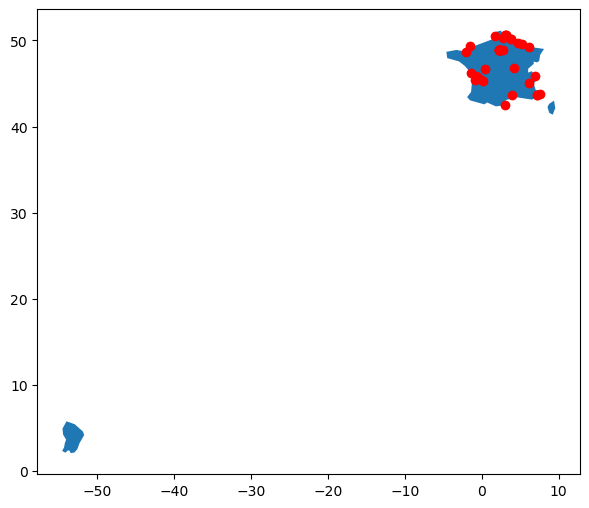

In [104]:
#plot the venues on a map of France
import geopandas as gpd
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(7,7))
ax.plot(longitude, latitude, 'ro')
# get a base map of Germany
map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres")) 
map = map[map.name == "France"]
# plot the map
map.plot(ax = ax)